SVM - supervised learning for classification and regression

1. hyperplane
 - decision boundary which seperates between given set of data points having different class labels
 - maximum margin hyperplane
 - maximum margin classifier
 
2. support vectors
 - sample data points, which are closest to the hyperplane
 - define the separating line or hyperplane better by calculating margin
 
3. margin
 - separation gap between two lines on the closest data points
 - calculated as perpendicular distance from the line to support vectors or closest data points

Problem with dispersed datasets

- sample data points are so dispersed that it is not possible to separate them using linear hyperplane
- SVM use kernel trick to transform the input space to a higher dimensional space 

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

voice.csv



# Importing all the necessary libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Reading the comma separated values file into the dataframe

In [4]:
df = pd.read_csv('../input/voice.csv')
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


- Data explore

In [5]:
# view dimensions of dataset

df.shape

(3168, 21)

In [6]:
# view the column names of the dataframe

col_names = df.columns

col_names

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

In [7]:
#check distribution of target_class column

df['label'].value_counts()

male      1584
female    1584
Name: label, dtype: int64

In [8]:
#view summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [9]:
#check for missing value in variables

df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

- outliers in numerical variables

In [10]:
round(df.describe(), 2)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00
mean,0.18,0.06,0.19,0.14,0.22,0.08,3.14,36.57,0.90,0.41,0.17,0.18,0.14,0.04,0.26,0.83,0.05,5.05,4.99,0.17
std,0.03,0.02,0.04,0.05,0.02,0.04,4.24,134.93,0.04,0.18,0.08,0.03,0.03,0.02,0.03,0.53,0.06,3.52,3.52,0.12
min,0.04,0.02,0.01,0.00,0.04,0.01,0.14,2.07,0.74,0.04,0.00,0.04,0.06,0.01,0.10,0.01,0.00,0.01,0.00,0.00
25%,0.16,0.04,0.17,0.11,0.21,0.04,1.65,5.67,0.86,0.26,0.12,0.16,0.12,0.02,0.25,0.42,0.01,2.07,2.04,0.10
50%,0.18,0.06,0.19,0.14,0.23,0.09,2.20,8.32,0.90,0.40,0.19,0.18,0.14,0.05,0.27,0.77,0.02,4.99,4.95,0.14
75%,0.20,0.07,0.21,0.18,0.24,0.11,2.93,13.65,0.93,0.53,0.22,0.20,0.17,0.05,0.28,1.18,0.07,7.01,6.99,0.21
max,0.25,0.12,0.26,0.25,0.27,0.25,34.73,1309.61,0.98,0.84,0.28,0.25,0.24,0.20,0.28,2.96,0.46,21.87,21.84,0.93


Text(0, 0.5, 'dfrange')

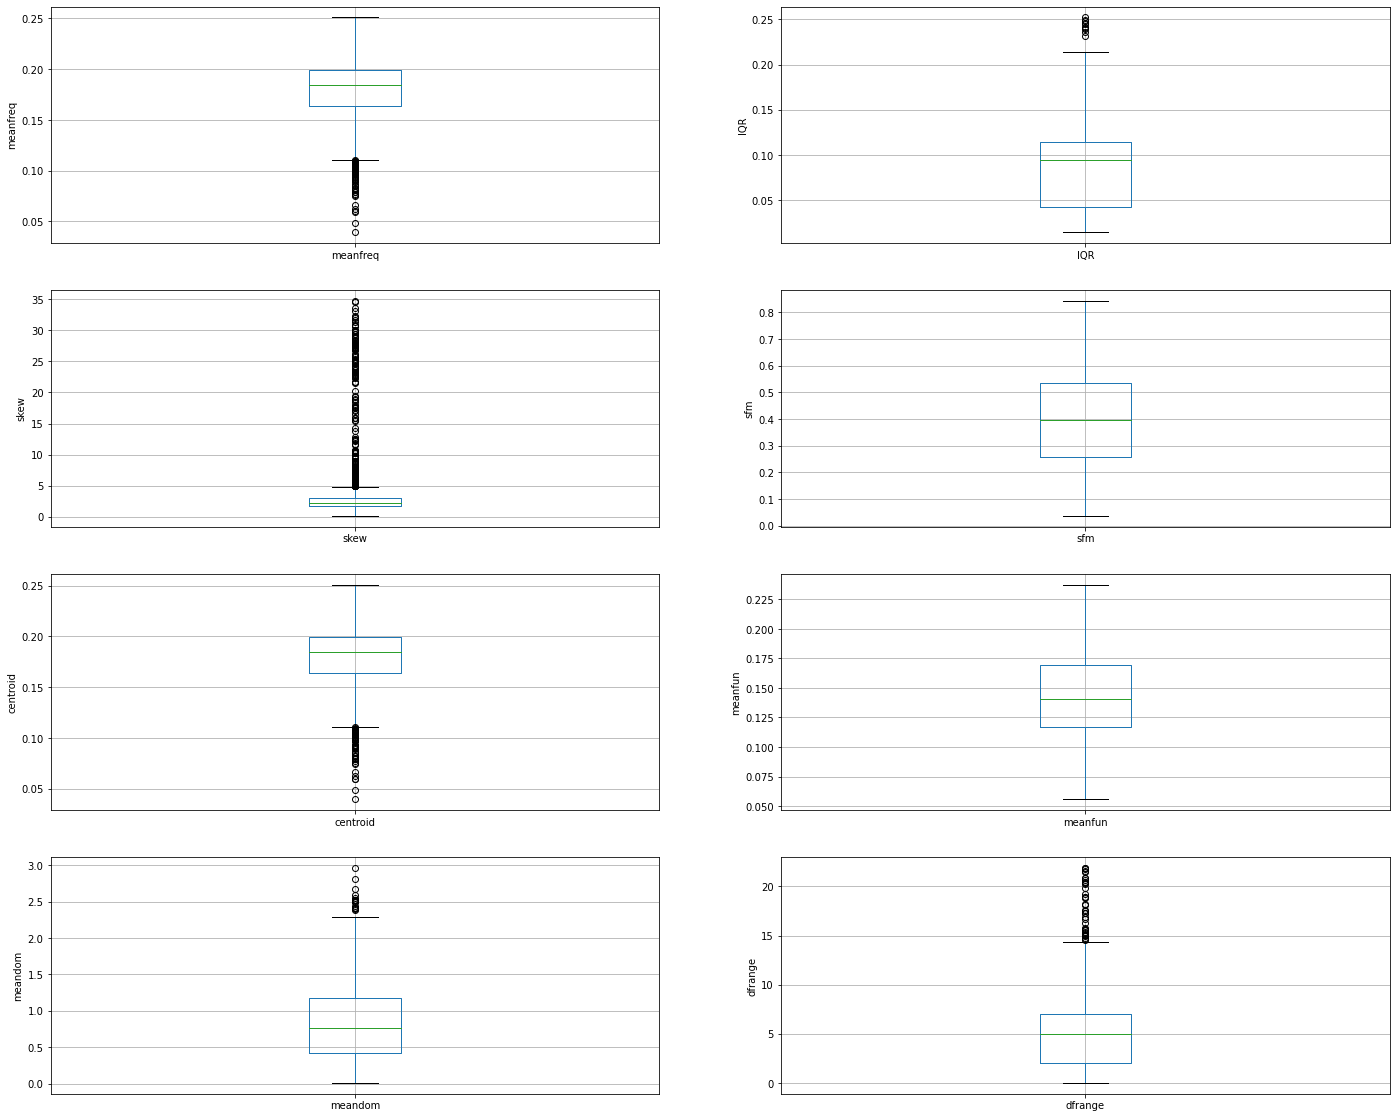

In [11]:
# draw boxplots to visualize outliers

plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df.boxplot(column='meanfreq')
fig.set_title('')
fig.set_ylabel('meanfreq')


plt.subplot(4, 2, 2)
fig = df.boxplot(column='IQR')
fig.set_title('')
fig.set_ylabel('IQR')


plt.subplot(4, 2, 3)
fig = df.boxplot(column='skew')
fig.set_title('')
fig.set_ylabel('skew')


plt.subplot(4, 2, 4)
fig = df.boxplot(column='sfm')
fig.set_title('')
fig.set_ylabel('sfm')


plt.subplot(4, 2, 5)
fig = df.boxplot(column='centroid')
fig.set_title('')
fig.set_ylabel('centroid')


plt.subplot(4, 2, 6)
fig = df.boxplot(column='meanfun')
fig.set_title('')
fig.set_ylabel('meanfun')


plt.subplot(4, 2, 7)
fig = df.boxplot(column='meandom')
fig.set_title('')
fig.set_ylabel('meandom')


plt.subplot(4, 2, 8)
fig = df.boxplot(column='dfrange')
fig.set_title('')
fig.set_ylabel('dfrange')

-> handle outlier with SVMs

- soft-margin variant of SVM: we can have few points incorrectly classified or classified with a margin less than 1
- But for such point, we have to pay a penalty in the form of C parameter, which controls outlier
- low C implies, allowing more outliers and high C implies less outlier

- So, in this case of dataset, data contains outlier so the value of C should be high while training the model

- check the distribution of variables by histogram

Text(0, 0.5, 'label')

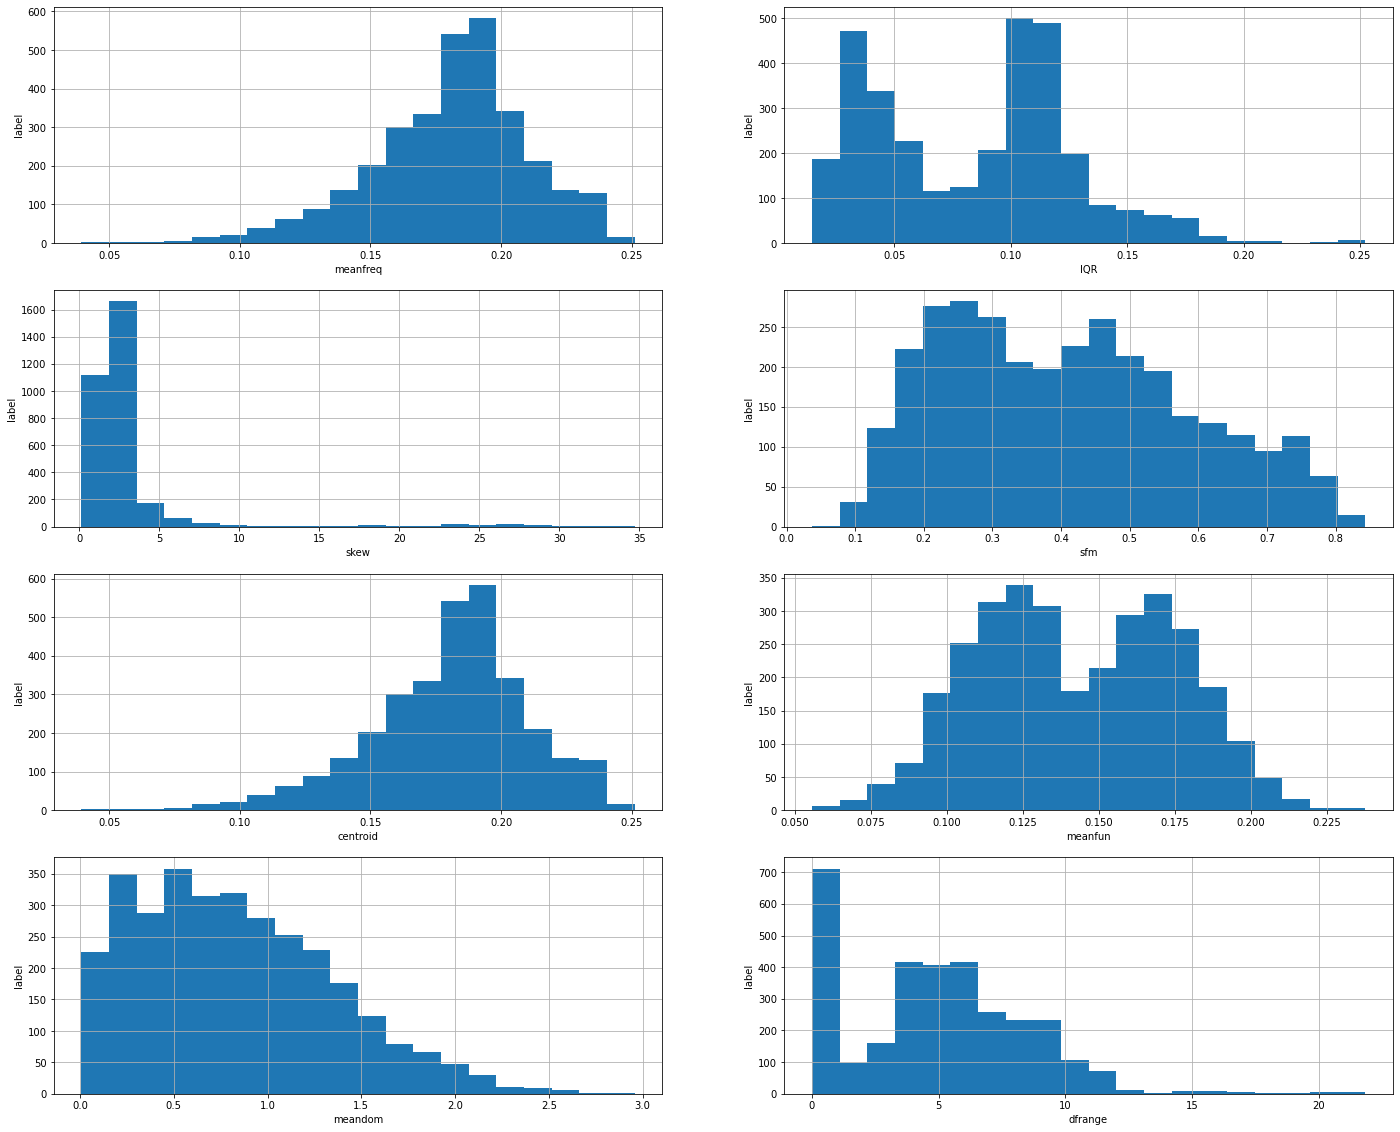

In [12]:
# plot histogram to check distribution


plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df['meanfreq'].hist(bins=20)
fig.set_xlabel('meanfreq')
fig.set_ylabel('label')


plt.subplot(4, 2, 2)
fig = df['IQR'].hist(bins=20)
fig.set_xlabel('IQR')
fig.set_ylabel('label')


plt.subplot(4, 2, 3)
fig = df['skew'].hist(bins=20)
fig.set_xlabel('skew')
fig.set_ylabel('label')



plt.subplot(4, 2, 4)
fig = df['sfm'].hist(bins=20)
fig.set_xlabel('sfm')
fig.set_ylabel('label')



plt.subplot(4, 2, 5)
fig = df['centroid'].hist(bins=20)
fig.set_xlabel('centroid')
fig.set_ylabel('label')



plt.subplot(4, 2, 6)
fig = df['meanfun'].hist(bins=20)
fig.set_xlabel('meanfun')
fig.set_ylabel('label')



plt.subplot(4, 2, 7)
fig = df['meandom'].hist(bins=20)
fig.set_xlabel('meandom')
fig.set_ylabel('label')


plt.subplot(4, 2, 8)
fig = df['dfrange'].hist(bins=20)
fig.set_xlabel('dfrange')
fig.set_ylabel('label')

skewed distribution

- Declare feature vector and target vairable

In [13]:
X = df.drop(['label'], axis=1)

y = df['label']

-> Converting string value to int type for labels

In [14]:
from sklearn.preprocessing import LabelEncoder
y=df.iloc[:,-1]

# Encode label category
# male -> 1
# female -> 0

gender_encoder = LabelEncoder()
y = gender_encoder.fit_transform(y)
y

array([1, 1, 1, ..., 0, 0, 0])

- Splitting dataset into training set and testing set for better generalisation

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [16]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((2534, 20), (634, 20))

- Feature scaling

In [17]:
cols = X_train.columns

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [19]:
X_train = pd.DataFrame(X_train, columns=[cols])

X_test = pd.DataFrame(X_test, columns=[cols])

In [20]:
X_train.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,2.534000e+03,2.534000e+03,2.534000e+03,2.534000e+03,2.534000e+03,2.534000e+03,2.534000e+03,2.534000e+03,2.534000e+03,2.534000e+03,2.534000e+03,2.534000e+03,2.534000e+03,2.534000e+03,2.534000e+03,2.534000e+03,2.534000e+03,2.534000e+03,2.534000e+03,2.534000e+03
mean,5.202582e-16,-1.016271e-16,6.615773e-18,-2.498166e-16,1.608246e-15,-4.339684e-17,-4.606944e-17,1.239910e-17,3.313538e-15,-1.997328e-16,1.958444e-16,5.202582e-16,3.477443e-16,-1.623274e-16,5.059094e-16,8.324482e-17,1.794802e-16,7.811869e-17,-3.075677e-17,1.673002e-16
std,1.000197e+00,1.000197e+00,1.000197e+00,1.000197e+00,1.000197e+00,1.000197e+00,1.000197e+00,1.000197e+00,1.000197e+00,1.000197e+00,1.000197e+00,1.000197e+00,1.000197e+00,1.000197e+00,1.000197e+00,1.000197e+00,1.000197e+00,1.000197e+00,1.000197e+00,1.000197e+00
min,-4.712049e+00,-2.325025e+00,-4.783735e+00,-2.878080e+00,-7.666832e+00,-1.626713e+00,-7.176443e-01,-2.590787e-01,-3.496038e+00,-2.095594e+00,-2.147270e+00,-4.712049e+00,-2.536122e+00,-1.391613e+00,-5.192071e+00,-1.549471e+00,-7.519633e-01,-1.441739e+00,-1.429399e+00,-1.470174e+00
25%,-5.758783e-01,-9.072186e-01,-4.328299e-01,-6.009076e-01,-6.677989e-01,-9.709601e-01,-3.550828e-01,-2.316512e-01,-7.377961e-01,-8.476049e-01,-6.090442e-01,-5.758783e-01,-8.006741e-01,-9.579635e-01,-1.680388e-01,-7.778558e-01,-7.056602e-01,-8.913781e-01,-8.872692e-01,-6.124958e-01
50%,1.221156e-01,1.159040e-01,1.305240e-01,-2.949289e-03,4.437171e-02,2.275547e-01,-2.234633e-01,-2.113679e-01,1.474928e-01,-7.062489e-02,2.796806e-01,1.221156e-01,-6.483360e-02,4.107266e-01,4.053130e-01,-1.261332e-01,-4.587105e-01,-1.450309e-02,-8.413238e-03,-2.942168e-01
75%,6.098480e-01,6.022266e-01,6.837864e-01,7.313528e-01,7.934313e-01,6.995949e-01,-4.670160e-02,-1.703654e-01,7.620371e-01,7.138653e-01,7.142860e-01,6.098480e-01,8.259514e-01,5.824555e-01,6.141058e-01,6.631549e-01,2.821387e-01,5.891550e-01,5.960107e-01,3.133999e-01
max,2.346561e+00,3.448126e+00,2.079955e+00,2.197939e+00,2.070487e+00,3.851241e+00,7.531038e+00,9.415687e+00,1.935249e+00,2.448990e+00,1.491798e+00,2.346561e+00,2.942277e+00,8.680906e+00,6.692918e-01,3.993969e+00,6.425014e+00,4.817005e+00,4.826978e+00,6.398979e+00


- Running SVM with default hyperparameter.

    -> default hyperparmeter means C=1.0, kernel = 'rbf', gamma=auto

In [21]:
# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc=SVC() 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.9763


    -> run SVM with C=100.0

In [22]:
# instantiate classifier with rbf kernel and C=100
svc=SVC(C=100.0) 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 0.9779


    -> run SVM with C=1000.0

In [23]:
# instantiate classifier with rbf kernel and C=1000
svc=SVC(C=1000.0) 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=1000.0 : 0.9732


    => 본 데이터에서는 C 파라미터를 바꾸는 것이 큰 의미는 없다

- Run SVM with different kernel

    -> linear kernel

In [24]:
# instantiate classifier with linear kernel and C=1.0
linear_svc=SVC(kernel='linear', C=1.0) 


# fit classifier to training set
linear_svc.fit(X_train,y_train)


# make predictions on test set
y_pred_test=linear_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with linear kernel and C=1.0 : 0.9779


In [25]:
y_pred_train = linear_svc.predict(X_train)

y_pred_train

array([0, 1, 0, ..., 1, 1, 1])

In [26]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9779


    -> we can see that the training set and test-set accuracy are very much comparable

In [27]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(linear_svc.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(linear_svc.score(X_test, y_test)))

Training set score: 0.9779
Test set score: 0.9779


    -> no question for overfitting!!

- Default Polynomial kernel

In [28]:
# instantiate classifier with polynomial kernel and C=1.0
poly_svc=SVC(kernel='poly', C=1.0) 


# fit classifier to training set
poly_svc.fit(X_train,y_train)


# make predictions on test set
y_pred=poly_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.9590


- run SVM with sigmoid kernel

In [29]:
# instantiate classifier with sigmoid kernel and C=1.0
sigmoid_svc=SVC(kernel='sigmoid', C=1.0) 


# fit classifier to training set
sigmoid_svc.fit(X_train,y_train)


# make predictions on test set
y_pred=sigmoid_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=1.0 : 0.7934


-> Polynomial and sigmoid kernel is performing poorly.The reason behind this maybe it is overfitting the training dataset

Confusion Matrix

- tool for summarizing the performance of classification algorithm
- gives us a clear picture of classification model performance and the types of errors produced by model
- represented in a tabular form



- True Positive(TP): predict observation belongs to certain class and observation actually belongs to that class

- True Negative(TN): predict observation does not belong to certain class and observation actually does not belong to that class

- False Negative(FP): predict observation belongs to certain class but observation actually does not belong to that class (Type 1 error)

- False Negative(FN): predict observation does not belong to certain class but observation actually belongs to that class (Type 2 error)

In [30]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[305   6]
 [  8 315]]

True Positives(TP) =  305

True Negatives(TN) =  315

False Positives(FP) =  6

False Negatives(FN) =  8


<AxesSubplot:>

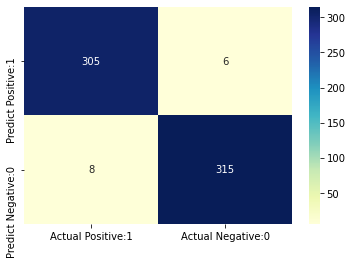

In [31]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

classification metrices


1. classification report

    - evaluate the classification model performance
    - displays precision, recall, f1, support score

In [32]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       311
           1       0.98      0.98      0.98       323

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



2. classification accuracy

In [33]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [34]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9779


- classification error

In [35]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0221


- precision: percentage of correctly predicted positivie outcomes out of all predicted positive outcomes

    - ratio of TP/(TP+FP)
    - identifies proportion of correctly predicted positive outcome

In [36]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9807


- Recall(sensitivity): percentage of correctly predicted positive outcomes out of all the actual positive outcomes

    - ratio of TP/(TP+FN)
    - identifies the proportion of correctly predicted actual positive

In [37]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9744


- True positive rate (recall)

In [38]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.9744


- False positive rate

In [39]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.0187


- specificity

In [40]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.9813


- f1-score

    - weighted harmonic mean of precision and recall
    - best would be 1.0 and worst would be 0.0
    - f1-score is always lower than accuracy measures as they embed precision and recall into their competition
    - weighted average of f1-score should be used to compare classifier models, not global accuracy

- ROC-AUC

    - plot which shows the performance of classification model at various classification threshold levels
    - True positive rate against False positive rate at various threshold levels
    - TPR(Recall) = TP/(TP+FN)
    - FPR = FP/(FP+TN)

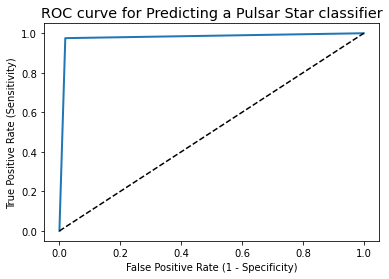

In [41]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Predicting a Pulsar Star classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

    - ROC curve help us to choose a threhold level that balances sensitivity and specify for a particular context
    
    - perfect classifier will have value 1, but purely random classifier will have value 0.5

In [42]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred_test)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9780


- cross-validated ROC AUC

In [43]:
# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(linear_svc, X_train, y_train, cv=10, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.9926


k-fold cross validation with shuffle split

In [47]:
from sklearn.model_selection import KFold


kfold=KFold(n_splits=5, shuffle=True, random_state=0)


linear_svc=SVC(kernel='linear')


linear_scores = cross_val_score(linear_svc, X, y, cv=kfold)

# print cross-validation scores with linear kernel

print('cross-validation scores with linear kernel:\n\n{}'.format(linear_scores))

cross-validation scores with linear kernel:

[0.92744479 0.92113565 0.91798107 0.9178515  0.9178515 ]


In [49]:
# print average cross-validation score with rbf kernel

print('Average stratified cross-validation score with rbf kernel:{:.4f}'.format(linear_scores.mean()))

Average stratified cross-validation score with rbf kernel:0.9205


Hyperparameter optimization using GridSearchCV

In [50]:
# import GridSearchCV
from sklearn.model_selection import GridSearchCV


# import SVC classifier
from sklearn.svm import SVC


# instantiate classifier with default hyperparameters with kernel=rbf, C=1.0 and gamma=auto
svc=SVC() 



# declare parameters for hyperparameter tuning
parameters = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
               {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
               {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05]} 
              ]




grid_search = GridSearchCV(estimator = svc,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'degree': [2, 3, 4],
                          'gamma': [0.01, 0.02, 0.03, 0.04, 0.05],
                          'kernel': ['poly']}],
             scoring='accuracy')

In [51]:
# examine the best model


# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))


# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))


# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.9830


Parameters that give the best results : 

 {'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}


Estimator that was chosen by the search : 

 SVC(C=1, gamma=0.2)


In [ ]:
# calculate GridSearch CV score on test set

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))